# Breast Cancer Detection Notebook

## Part 1: Data Preprocessing

### Importing the libraries and dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Load the data

In [3]:
data = pd.read_csv('/content/data.csv')  # Adjust the path as needed

### Data Exploration

In [4]:
print(data.head())
print(data.info())
print(data.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

### Dealing with missing values

In [5]:
print(data.isnull().sum())
# If there are missing values, you might want to handle them here
# For example: data = data.dropna()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### Count plot

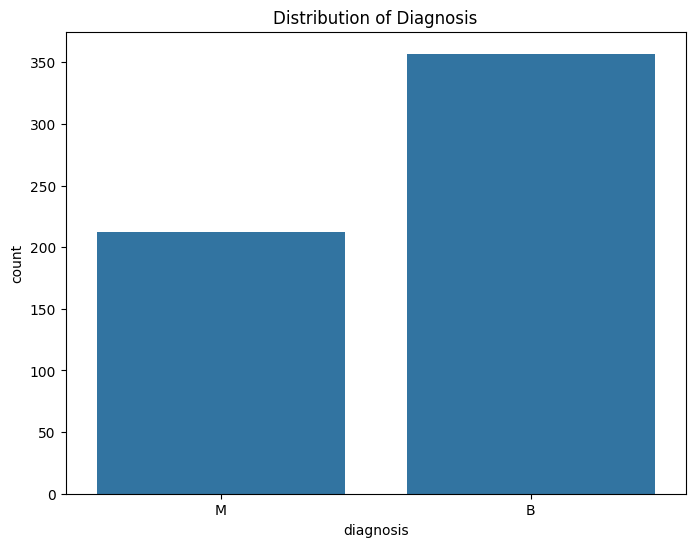

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

### Correlation matrix and heatmap

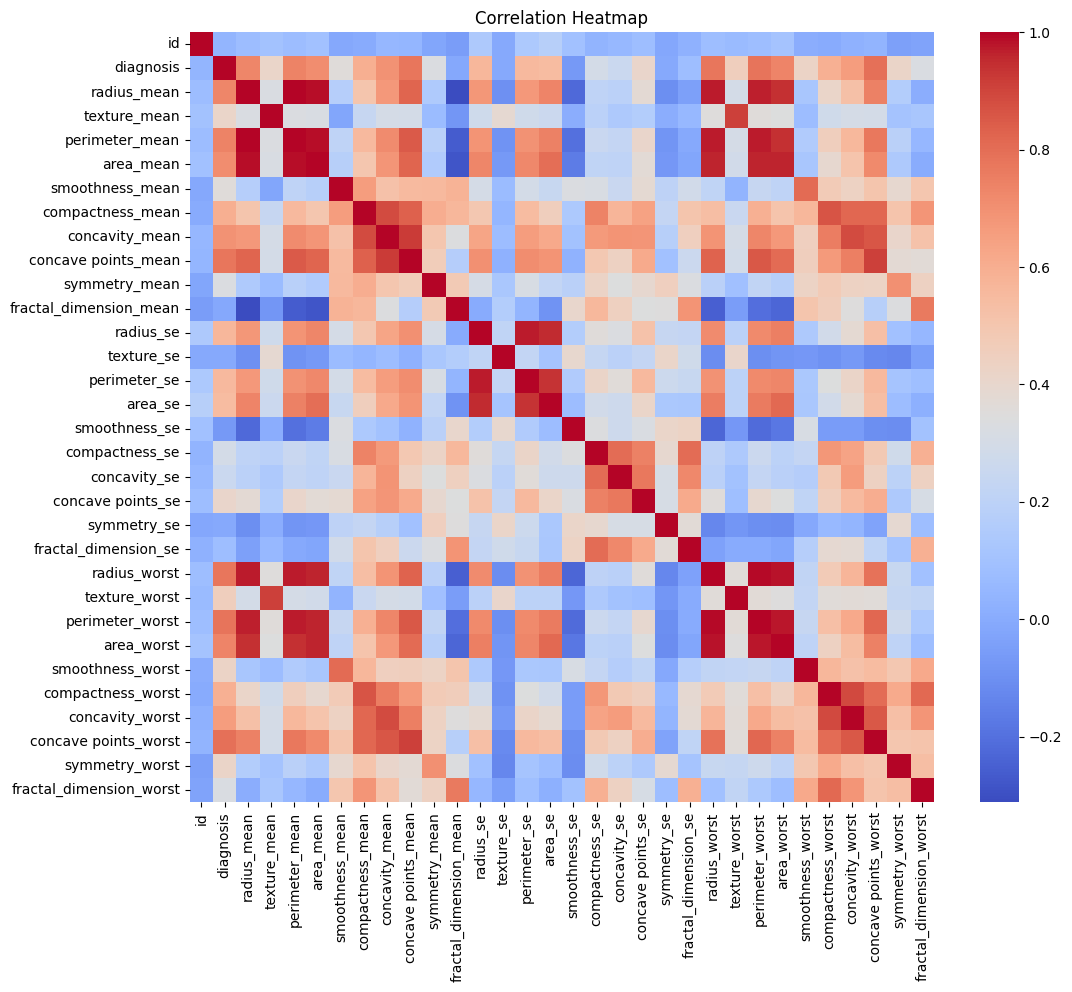

In [8]:
# Convert 'diagnosis' column to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Dealing with Categorical data


### Splitting the dataset into train and test set


In [12]:
### Dealing with Categorical data

# Check if 'diagnosis' column exists
if 'diagnosis' in data.columns:
    # One-hot encode the 'diagnosis' column
    data = pd.get_dummies(data, columns=['diagnosis'], prefix='diagnosis')

    # Identify the encoded column names
    diagnosis_columns = [col for col in data.columns if col.startswith('diagnosis_')]

    if len(diagnosis_columns) == 2:
        # If we have two diagnosis columns, use one as target
        y = data[diagnosis_columns[0]]
        X = data.drop(diagnosis_columns, axis=1)
    else:
        # If we have more or fewer than two columns, handle differently
        print(f"Unexpected number of diagnosis columns: {diagnosis_columns}")
        y = data[diagnosis_columns[0]]  # Choose the first as target
        X = data.drop(diagnosis_columns, axis=1)
else:
    # If 'diagnosis' column doesn't exist, assume it's already encoded
    diagnosis_columns = [col for col in data.columns if col.startswith('diagnosis_')]
    if diagnosis_columns:
        y = data[diagnosis_columns[0]]
        X = data.drop(diagnosis_columns, axis=1)
    else:
        raise ValueError("No 'diagnosis' or 'diagnosis_' columns found in the dataset")

print("Features:", X.columns.tolist())
print("Target:", y.name)

Features: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Target: diagnosis_0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Part 2: Building the models

### 1. Logistic Regression

In [15]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# Cross-validation

In [16]:
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print("Logistic Regression CV Scores:", lr_scores)
print("Logistic Regression CV Average Score:", lr_scores.mean())

Logistic Regression CV Scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Logistic Regression CV Average Score: 0.9736263736263737


### 2. Random Forest

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Cross-validation

In [18]:
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("Random Forest CV Scores:", rf_scores)
print("Random Forest CV Average Score:", rf_scores.mean())

Random Forest CV Scores: [0.96703297 0.94505495 0.97802198 0.94505495 0.92307692]
Random Forest CV Average Score: 0.9516483516483516


## Part 3: Randomized search to find the best parameters (Logistic Regression)


In [19]:
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [20]:
lr_random = RandomizedSearchCV(LogisticRegression(random_state=42),
                               param_distributions=param_dist,
                               n_iter=100,
                               cv=5,
                               random_state=42)

In [21]:
lr_random.fit(X_train_scaled, y_train)

print("Best parameters:", lr_random.best_params_)
print("Best cross-validation score:", lr_random.best_score_)

Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.08858667904100823}
Best cross-validation score: 0.9780219780219781


## Part 4: Final model (Logistic Regression)

In [22]:
final_lr_model = LogisticRegression(**lr_random.best_params_, random_state=42)
final_lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.08858667904100823, random_state=42, solver='liblinear')

In [23]:
# Cross-validation
final_lr_scores = cross_val_score(final_lr_model, X_train_scaled, y_train, cv=5)
print("Final Logistic Regression CV Scores:", final_lr_scores)
print("Final Logistic Regression CV Average Score:", final_lr_scores.mean())

Final Logistic Regression CV Scores: [0.98901099 0.96703297 0.98901099 0.97802198 0.96703297]
Final Logistic Regression CV Average Score: 0.9780219780219781


In [24]:
# Evaluate on test set
y_pred = final_lr_model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.98      0.99        43
        True       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [25]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[42  1]
 [ 0 71]]


## Part 5: Predicting a single observation

In [26]:
# Let's use the first row of the test set as an example
single_observation = X_test_scaled[0].reshape(1, -1)
prediction = final_lr_model.predict(single_observation)
prediction_proba = final_lr_model.predict_proba(single_observation)

In [27]:
print("Prediction:", "Malignant" if prediction[0] == 1 else "Benign")
print("Probability of Malignant:", prediction_proba[0][1])
print("Probability of Benign:", prediction_proba[0][0])

Prediction: Malignant
Probability of Malignant: 0.8046375135710787
Probability of Benign: 0.1953624864289213
